# Import required libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)

In [ ]:
# Load dataset
data = pd.read_csv("Breast_Cancer.csv")
data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [ ]:
# Check for missing values
print("Missing values:")
print(data.isna().sum())

Missing values:
Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Regional Node Positive    0
Survival Months           0
Status                    0
dtype: int64


In [ ]:
# Check if there are duplicate rows
data.duplicated().sum()

1

In [ ]:
# Show all duplicate lines
duplicate_rows = data[data.duplicated(keep=False)]
print(duplicate_rows)

     Age   Race Marital Status T Stage  N Stage 6th Stage  \
213   63  White        Married       T1      N1       IIA   
436   63  White        Married       T1      N1       IIA   

                 differentiate Grade   A Stage  Tumor Size Estrogen Status  \
213  Moderately differentiated     2  Regional          17        Positive   
436  Moderately differentiated     2  Regional          17        Positive   

    Progesterone Status  Regional Node Examined  Regional Node Positive  \
213            Positive                       9                       1   
436            Positive                       9                       1   

     Survival Months Status  
213               56  Alive  
436               56  Alive  


In [ ]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [ ]:
# View the overall information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4023 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4023 non-null   int64 
 1   Race                    4023 non-null   object
 2   Marital Status          4023 non-null   object
 3   T Stage                 4023 non-null   object
 4   N Stage                 4023 non-null   object
 5   6th Stage               4023 non-null   object
 6   differentiate           4023 non-null   object
 7   Grade                   4023 non-null   object
 8   A Stage                 4023 non-null   object
 9   Tumor Size              4023 non-null   int64 
 10  Estrogen Status         4023 non-null   object
 11  Progesterone Status     4023 non-null   object
 12  Regional Node Examined  4023 non-null   int64 
 13  Regional Node Positive  4023 non-null   int64 
 14  Survival Months         4023 non-null   int64 
 15  Status   

In [ ]:
# Print the number of unique values for each column
for col in data.columns:
    print(f'{col} has {data[col].nunique()} values')

Age has 40 values
Race has 3 values
Marital Status has 5 values
T Stage  has 4 values
N Stage has 3 values
6th Stage has 5 values
differentiate has 4 values
Grade has 4 values
A Stage has 2 values
Tumor Size has 110 values
Estrogen Status has 2 values
Progesterone Status has 2 values
Regional Node Examined has 54 values
Regional Node Positive has 38 values
Survival Months has 107 values
Status has 2 values


In [ ]:
# Classify columns: categorical columns and numerical columns
# Categorical columns: if the number of unique values is 5 or fewer
cat_cols = [col for col in data.columns if data[col].nunique() <= 5]
# Numerical columns: if the number of unique values is 6 or more
num_cols = [col for col in data.columns if data[col].nunique() >= 6]

In [ ]:
len(cat_cols)

11

In [ ]:
len(num_cols)

5

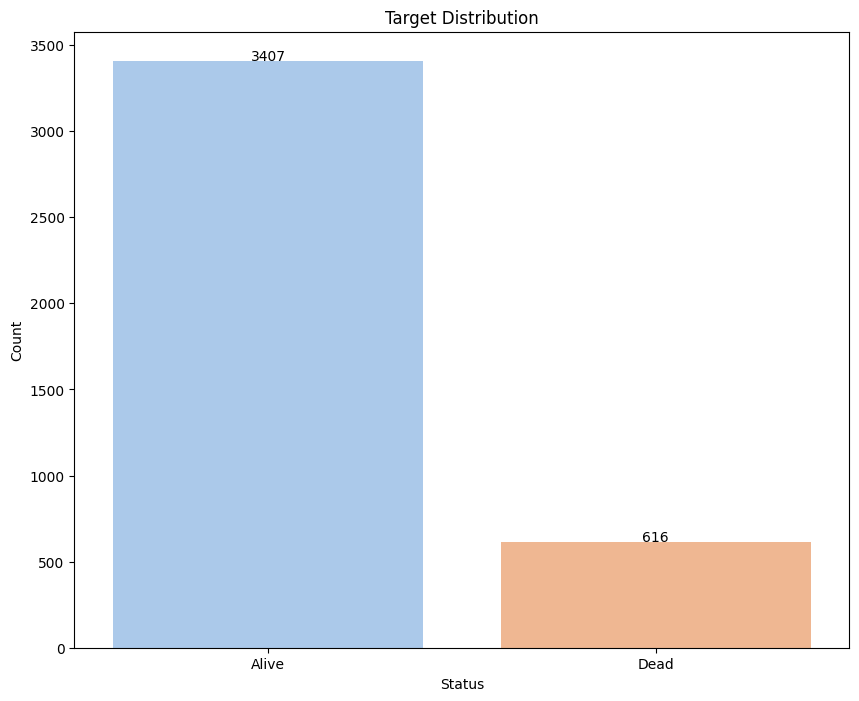

In [ ]:
# Target distribution
# Set the figure size and create a count plot
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='Status', data=data, palette='pastel')

# Add labels to each bar in the plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3, f'{int(p.get_height())}', ha="center")

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Target Distribution')
plt.show()

In [ ]:
# View the specific values in the categorical columns
for col in cat_cols:
    print(f'{col} has {data[col].unique()} values')

Race has ['White' 'Black' 'Other'] values
Marital Status has ['Married' 'Divorced' 'Single ' 'Widowed' 'Separated'] values
T Stage  has ['T1' 'T2' 'T3' 'T4'] values
N Stage has ['N1' 'N2' 'N3'] values
6th Stage has ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB'] values
differentiate has ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated'] values
Grade has ['3' '2' '1' ' anaplastic; Grade IV'] values
A Stage has ['Regional' 'Distant'] values
Estrogen Status has ['Positive' 'Negative'] values
Progesterone Status has ['Positive' 'Negative'] values
Status has ['Alive' 'Dead'] values


In [ ]:
# Clean 'Marital Status' column by removing extra spaces
data['Marital Status'] = data['Marital Status'].str.strip()

# Rename 'Grade' column values
data['Grade'] = data['Grade'].replace({
    '3': 'Grade III',
    '2': 'Grade II',
    '1': 'Grade I',
    ' anaplastic; Grade IV': 'Grade IV'
})

# Rename 'differentiate' column values for better visualization
data['differentiate'] = data['differentiate'].replace({
    'Poorly differentiated': 'Poor',
    'Moderately differentiated': 'Moderate',
    'Well differentiated': 'Well',
    'Undifferentiated': 'Undiff'
})

In [ ]:
# View the specific values in the categorical columns
for col in cat_cols:
    print(f'{col} has {data[col].unique()} values')

Race has ['White' 'Black' 'Other'] values
Marital Status has ['Married' 'Divorced' 'Single' 'Widowed' 'Separated'] values
T Stage  has ['T1' 'T2' 'T3' 'T4'] values
N Stage has ['N1' 'N2' 'N3'] values
6th Stage has ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB'] values
differentiate has ['Poor' 'Moderate' 'Well' 'Undiff'] values
Grade has ['Grade III' 'Grade II' 'Grade I' 'Grade IV'] values
A Stage has ['Regional' 'Distant'] values
Estrogen Status has ['Positive' 'Negative'] values
Progesterone Status has ['Positive' 'Negative'] values
Status has ['Alive' 'Dead'] values


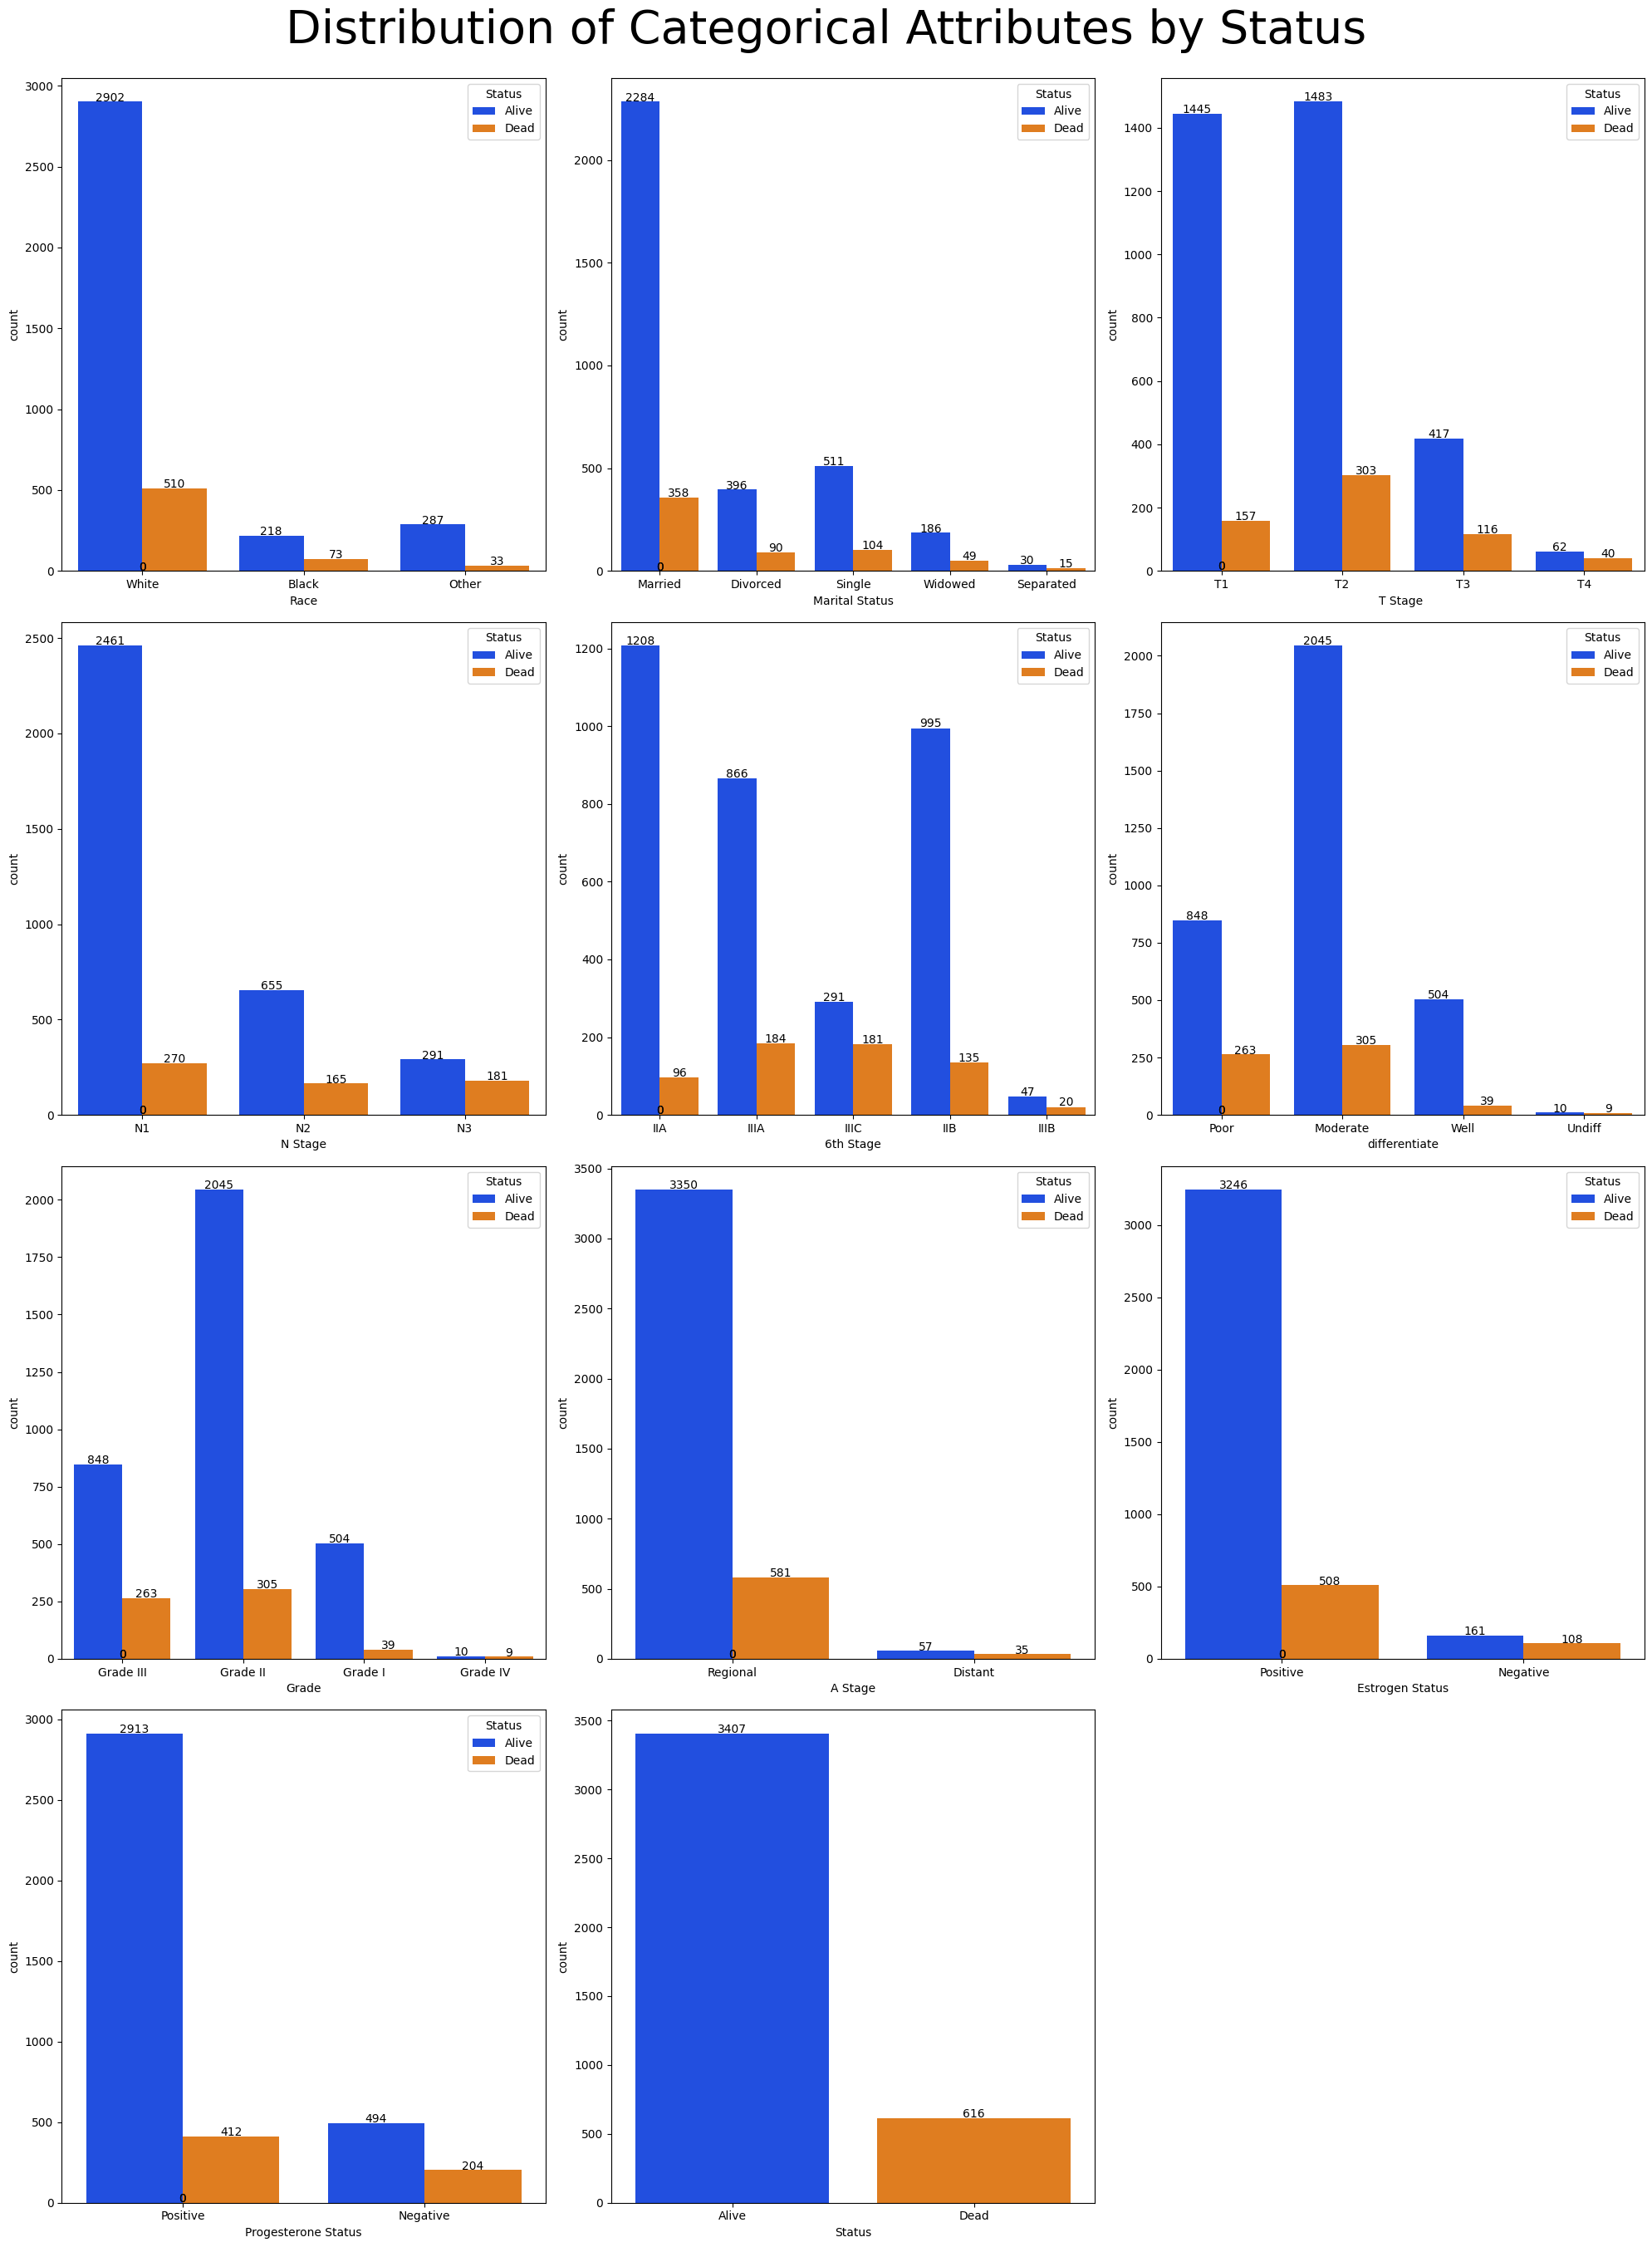

In [ ]:
plt.figure(figsize=(20, 27))
plotnumber = 1

# Loop through each column in the dataframe
for col in cat_cols:
    if plotnumber <= len(cat_cols):
        plt.subplot(4, 3, plotnumber)
        ax = sns.countplot(x=data[col], hue=data['Status'], palette='bright')

        # Add labels to each bar in the plot
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3, f'{int(p.get_height())}', ha="center")

    plotnumber += 1

plt.suptitle('Distribution of Categorical Attributes by Status', fontsize=40, y=1)
plt.tight_layout()
plt.show()

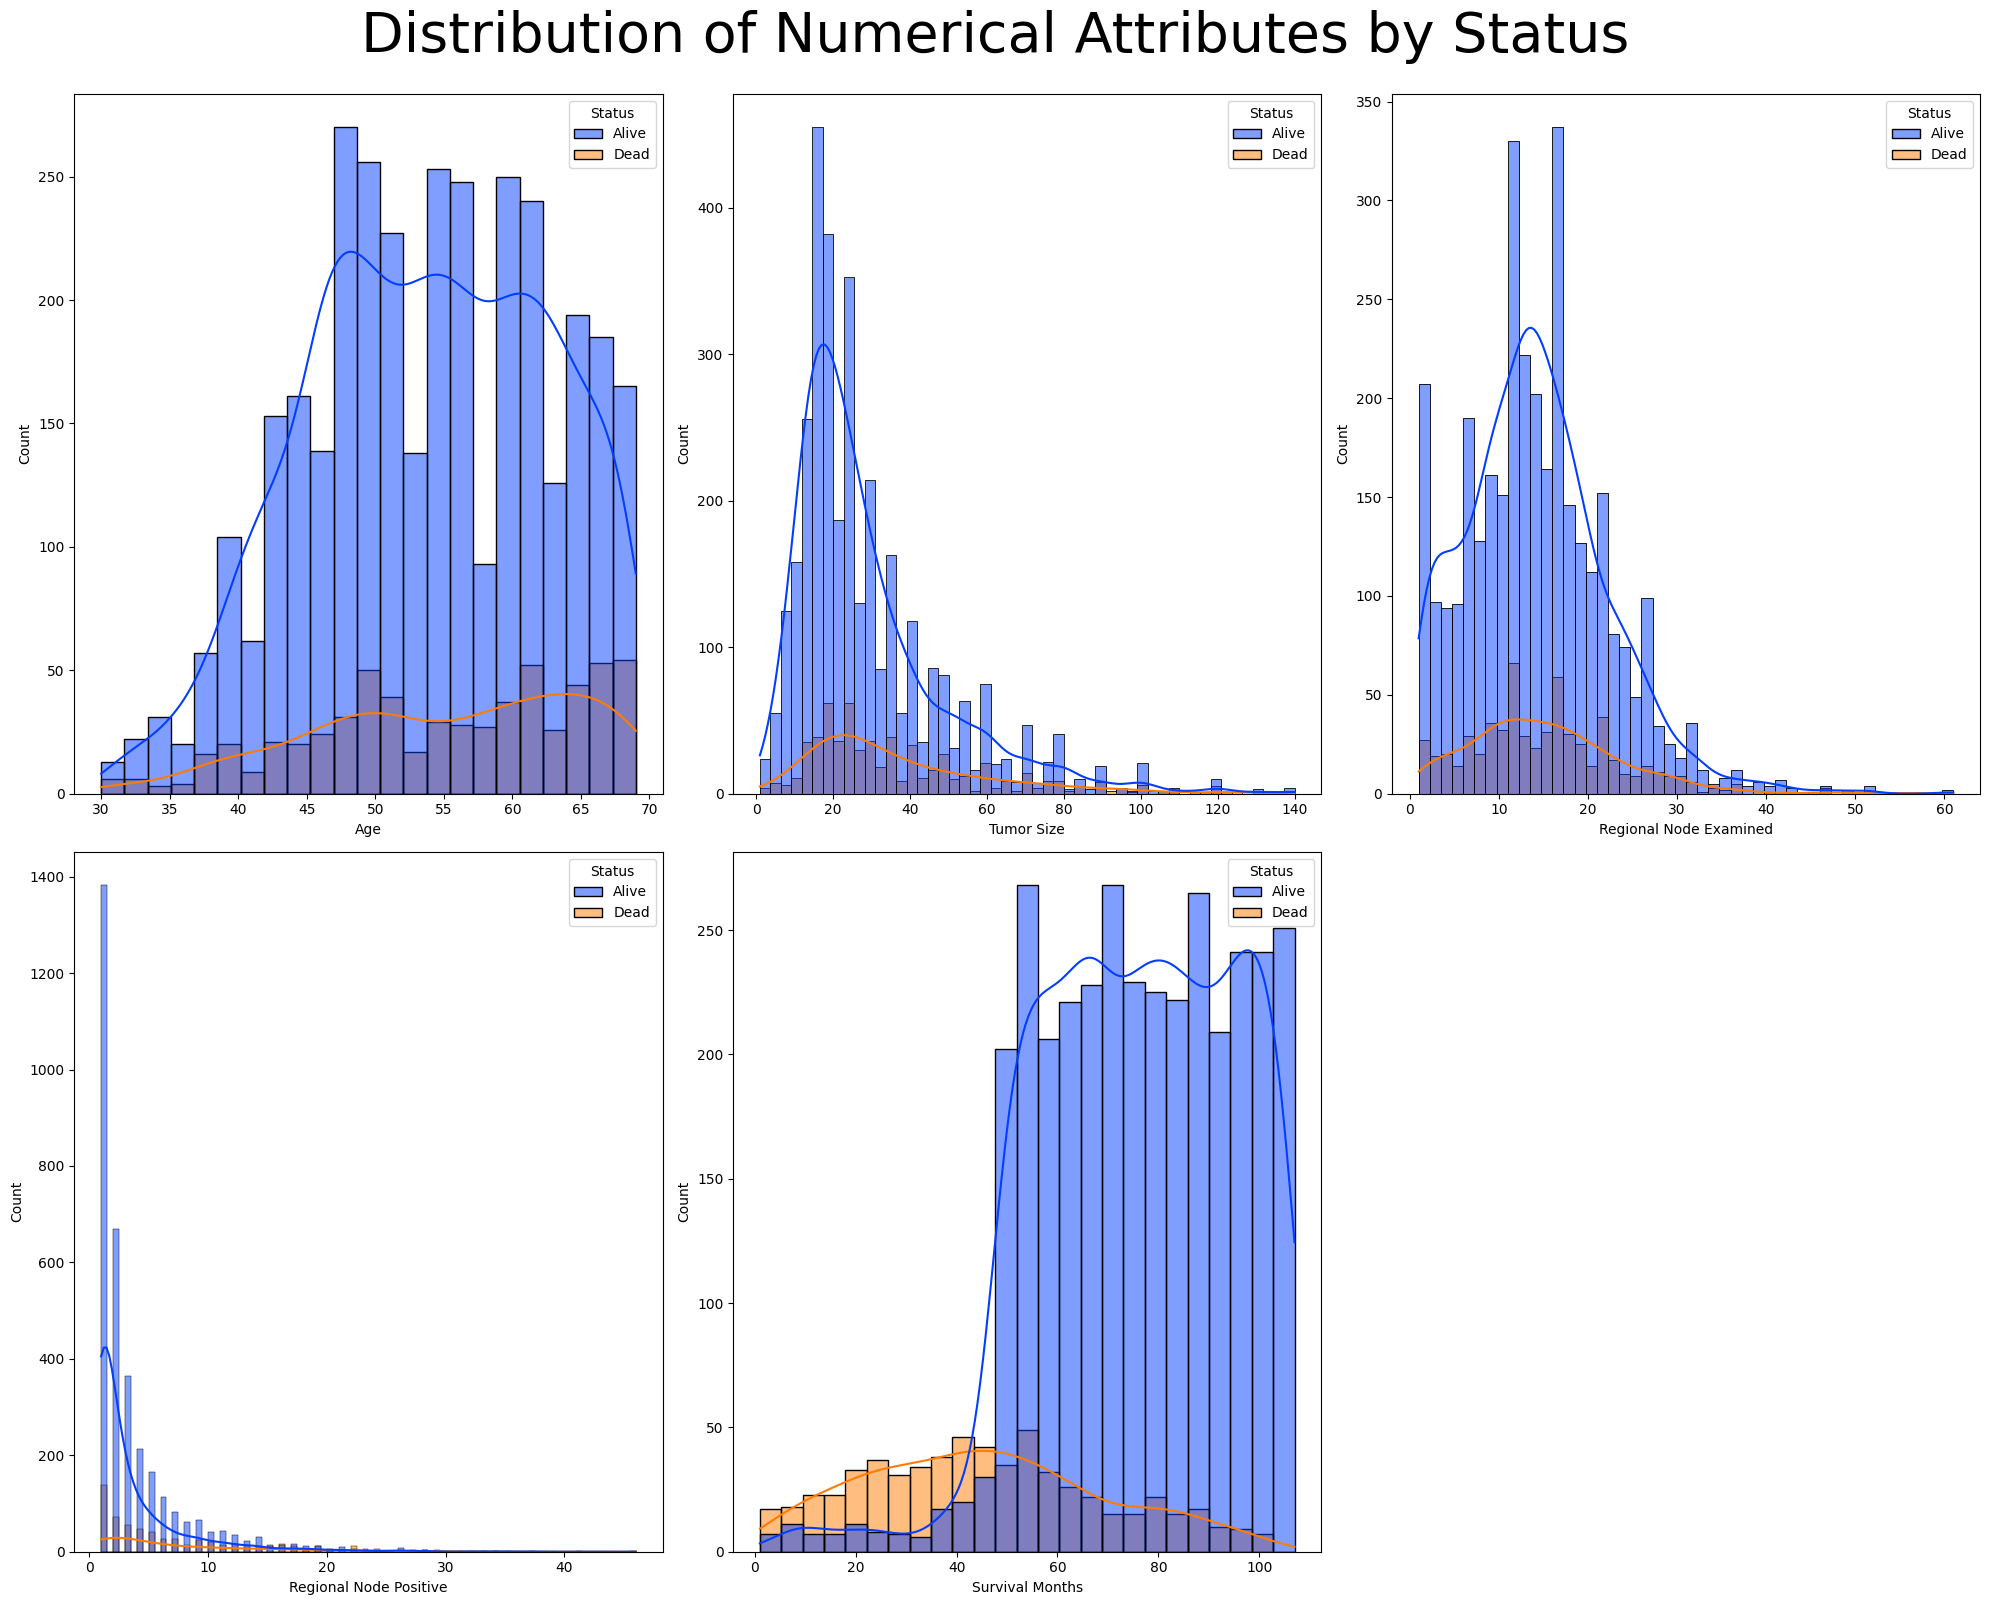

In [ ]:
plt.figure(figsize=(20, 16))
plotnumber = 1

# Loop through each column in the dataframe
for col in num_cols:
    plt.subplot(2, 3, plotnumber)
    sns.histplot(data=data, x=col, hue='Status', kde=True, palette='bright')  # Use 'hue' to differentiate by target
    plt.xlabel(col)
    plotnumber += 1

# Set the main title and adjust layout
plt.suptitle('Distribution of Numerical Attributes by Status', fontsize=40, y=1)
plt.tight_layout()
plt.show()

# Data Preprocessing

In [ ]:
# Feature encoding (label encoding)
# Convert categories to numeric values ​​using category labels
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

# Select features and target
X = data.drop(columns=['Status'])  # Features
y = data['Status']  # Target

# Save column name
feature_names = X.columns

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Use scaler for SVM as it helps focus on optimizing distance between layers and ensuring correctness of kernel functions

# Model Selection

In [ ]:
# Build SVM model
model = SVC(kernel='linear')

# Train and make predictions

In [ ]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model Evaluation

In [ ]:
# Calculate indexes
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print out the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Store indicators into a list to draw a chart
metrics = [accuracy, precision, recall, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.901863354037267
Precision: 0.8796591906776279
Recall: 0.7209718254244768
F1-score: 0.7695207030896076

Confusion Matrix:
[[668  10]
 [ 69  58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.94       678
           1       0.85      0.46      0.59       127

    accuracy                           0.90       805
   macro avg       0.88      0.72      0.77       805
weighted avg       0.90      0.90      0.89       805



# Confusion Matrix

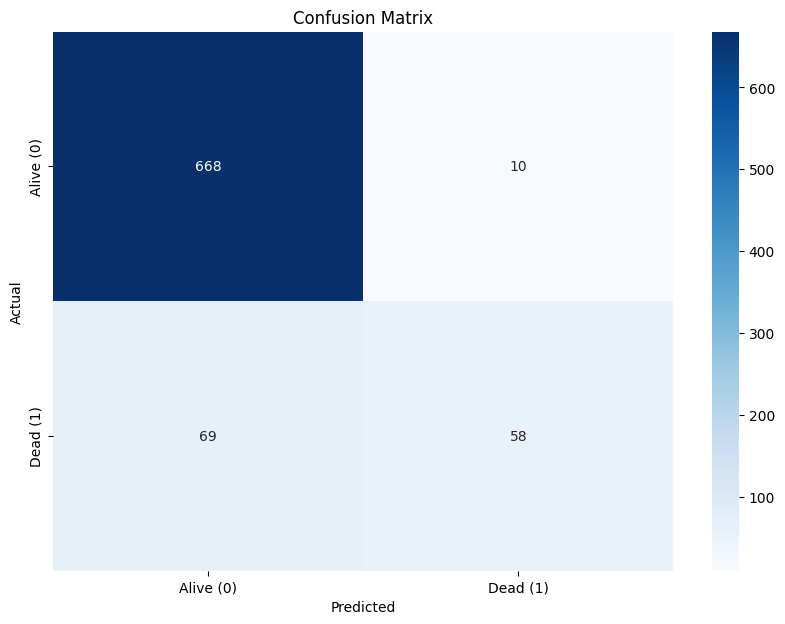

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Draw the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Alive (0)', 'Dead (1)'],
            yticklabels=['Alive (0)', 'Dead (1)'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Chart of classification report values:

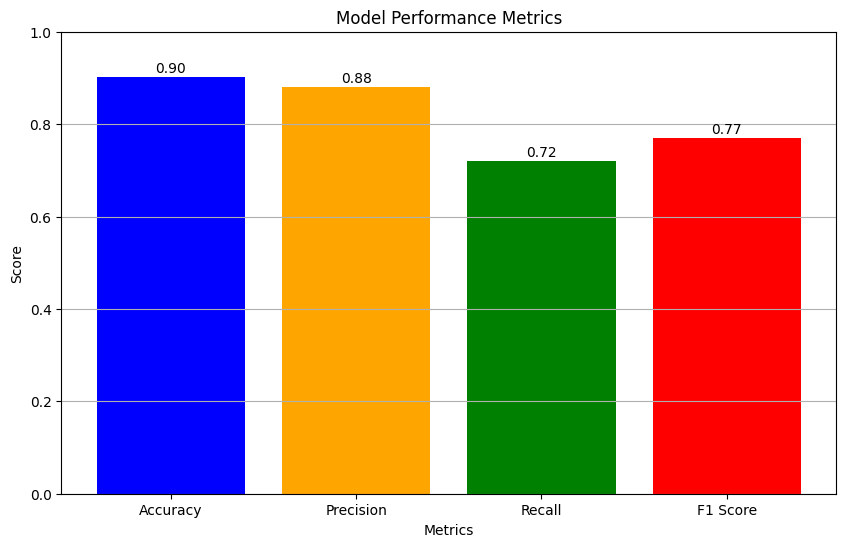

In [ ]:
# Draw a chart
plt.figure(figsize=(10, 6))
plt.bar(labels, metrics, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)  # Limit the y axis from 0 to 1
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.grid(axis='y')

# Show values ​​on bars
for i, v in enumerate(metrics):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.show()

# Chart of important features

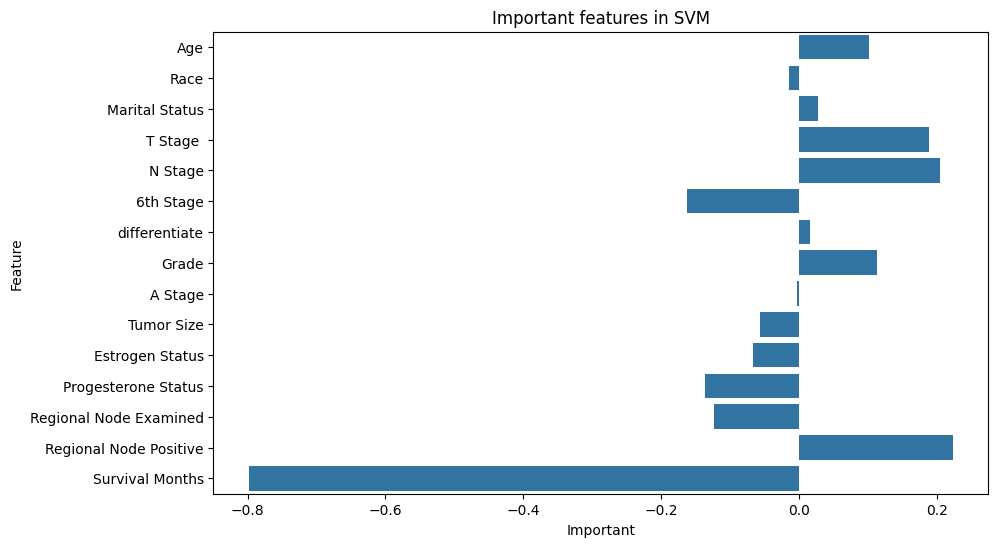

In [ ]:
# Calculate the importance of features
importance = model.coef_[0]

# Draw a chart
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=feature_names)
plt.title('Important features in SVM')
plt.xlabel('Important')
plt.ylabel('Feature')
plt.show()

# Use the SMOTE method to rebalance the sample

In [ ]:
# Rebalance data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

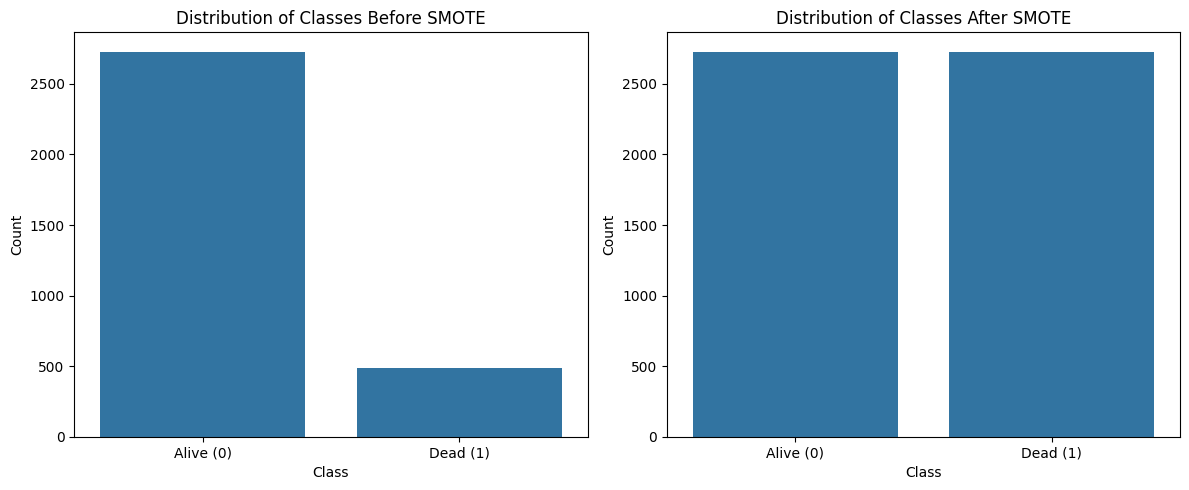

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Distribution of Classes Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Alive (0)', 'Dead (1)'])

# Plot the class distribution after applying SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled)
plt.title('Distribution of Classes After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Alive (0)', 'Dead (1)'])

plt.tight_layout()
plt.show()

# Train and make predictions after SMOTE

In [ ]:
model.fit(X_train_resampled, y_train_resampled)
y_pred_resampled = model.predict(X_test)

# Model Evaluation after SMOTE

In [ ]:
# Calculate indexes
accuracy = accuracy_score(y_test, y_pred_resampled)
precision = precision_score(y_test, y_pred_resampled, average='macro')
recall = recall_score(y_test, y_pred_resampled, average='macro')
f1 = f1_score(y_test, y_pred_resampled, average='macro')

# Print out the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Store indicators into a list to draw a chart
metrics = [accuracy, precision, recall, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_resampled))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_resampled))

Accuracy: 0.8099378881987578
Precision: 0.6958493656606864
Recall: 0.7943813439249297
F1-score: 0.7201361542778847

Confusion Matrix:
[[554 124]
 [ 29  98]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       678
           1       0.44      0.77      0.56       127

    accuracy                           0.81       805
   macro avg       0.70      0.79      0.72       805
weighted avg       0.87      0.81      0.83       805



# Confusion Matrix after SMOTE

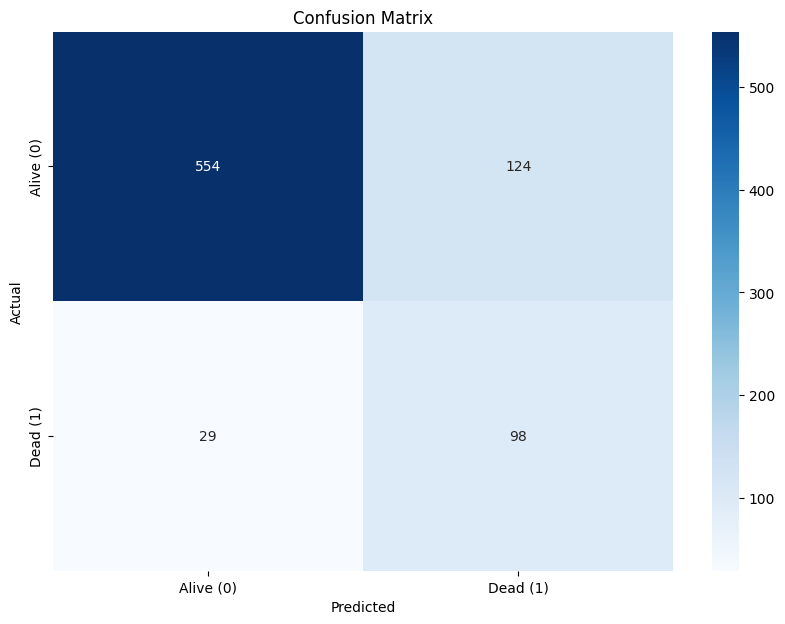

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_resampled)

# Draw the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Alive (0)', 'Dead (1)'],
            yticklabels=['Alive (0)', 'Dead (1)'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Chart of classification report values after SMOTE:

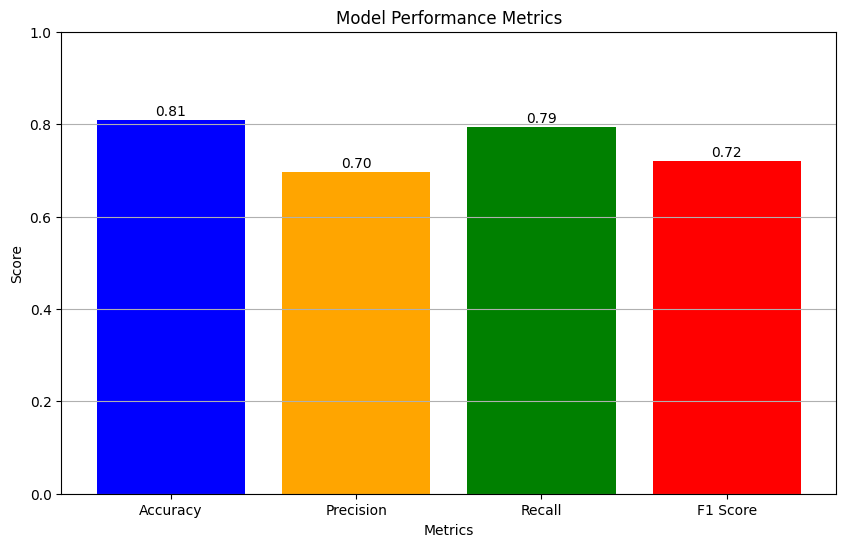

In [ ]:
# Draw a chart
plt.figure(figsize=(10, 6))
plt.bar(labels, metrics, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)  # Limit the y axis from 0 to 1
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.grid(axis='y')

# Show values ​​on bars
for i, v in enumerate(metrics):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.show()

# Chart of important features after SMOTE

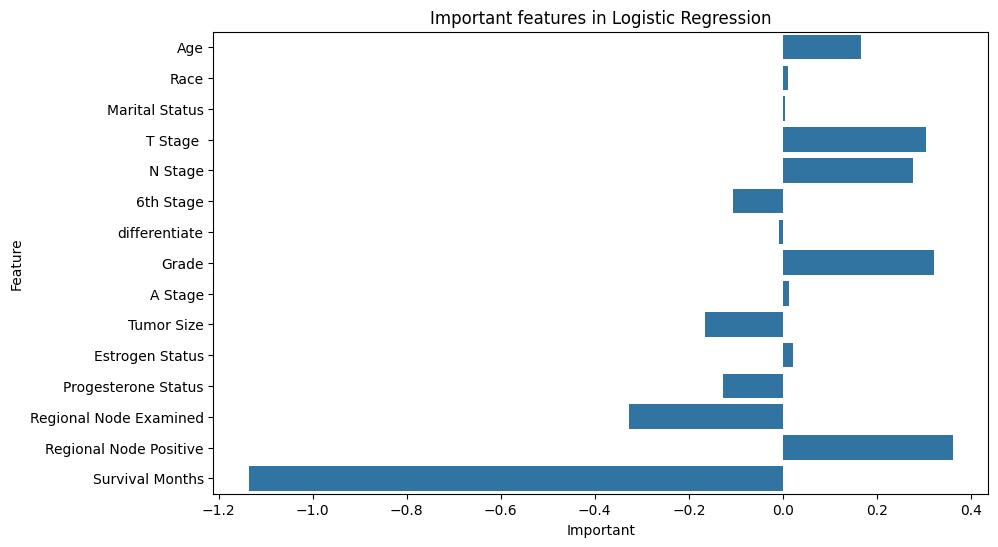

In [ ]:
# Calculate the importance of features
importance = model.coef_[0]

# Draw a chart
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=feature_names)
plt.title('Important features in Logistic Regression')
plt.xlabel('Important')
plt.ylabel('Feature')
plt.show()